<a href="https://colab.research.google.com/github/Sanidhyar10/Intro-to-Data-Science-using-python-/blob/main/Dimension_reduction_IT2K21_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10: Dimension Reduction

Dimension reduction is a process in data analysis and machine learning where the number of input variables or features in a dataset is reduced. The objective is to simplify the dataset while retaining as much relevant information as possible.

This reduction in dimensionality can have several benefits:

Simplification of Models: With fewer dimensions, models become simpler and easier to interpret. This can lead to improved model performance and generalization to new data.

Computational Efficiency: Working with a reduced set of dimensions often requires less computational resources and can speed up the training and inference phases of machine learning models.

*Visualization: *Reducing dimensions facilitates visualization of data, especially when working with high-dimensional datasets. It allows the representation of data in two or three dimensions, making it easier to grasp patterns and relationships.

Noise Reduction: Eliminating irrelevant or redundant features can help in removing noise from the dataset, resulting in more robust and accurate models.

Handling Multicollinearity: In linear models, multicollinearity (high correlation between features) can cause instability. Dimension reduction methods can help mitigate this issue.

There are two main types of dimension reduction techniques:

Feature Selection: Involves selecting a subset of the original features based on their importance or relevance to the task. Common methods include filter methods (e.g., correlation, mutual information), wrapper methods (e.g., recursive feature elimination), and embedded methods (e.g., LASSO regression).

Feature Extraction: Involves transforming the original features into a new set of features (principal components) using linear algebra techniques. Principal Component Analysis (PCA) is a popular feature extraction method. Other methods include t-distributed Stochastic Neighbor Embedding (t-SNE) for nonlinear dimensionality reduction.

In summary, dimension reduction aims to strike a balance between preserving the essential information in the data and reducing its complexity, leading to more efficient and effective data analysis and machine learning.


#  Demonstrate How you will Identify Multicollinearity Python

[1.012777913307497, 1.0132879459150421, 1.0005091389542846]

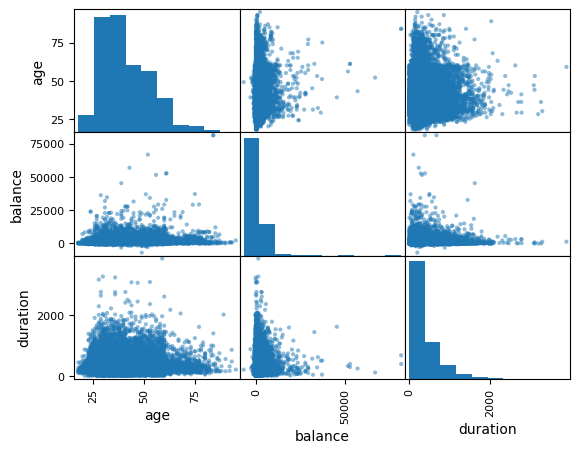

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["age", "balance", "duration"]

# Extract the predictor variables into their own data frame
X = pd.DataFrame(bank_data[predictor_columns])

# Create a scatterplot matrix
pd.plotting.scatter_matrix(X)

# Remove records with missing values
X = X.dropna()

# Add the constant term
X = sm.add_constant(X)

# Calculate VIF values
vif_values = [inf.variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif_values


# Demonstrate How you'll apply Principal Components Analysis Using Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the bank dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Replace these columns with your actual predictor variable names
predictor_columns = ["age", "balance", "duration"]

# Extract the predictor variables into their own data frame
X = bank_data[predictor_columns]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Obtain the correlation matrix
correlation_matrix = pd.DataFrame(X_standardized, columns=predictor_columns).corr()

# Print the correlation matrix
print(correlation_matrix)

# Run PCA with the maximum number of components (3 in this case)
pca = PCA(n_components=min(X.shape[0], X.shape[1]))
principal_components = pca.fit_transform(X_standardized)

# Get the variability explained by each component
explained_variance_ratios = pca.explained_variance_ratio_
print("Variability explained by each component:", explained_variance_ratios)

# Get the cumulative variability explained
cumulative_variability = np.cumsum(explained_variance_ratios)
print("Cumulative variability explained:", cumulative_variability)


               age   balance  duration
age       1.000000  0.112300  0.000189
balance   0.112300  1.000000  0.022436
duration  0.000189  0.022436  1.000000
Variability explained by each component: [0.37151856 0.3333091  0.29517234]
Cumulative variability explained: [0.37151856 0.70482766 1.        ]
